
<a href="https://colab.research.google.com/github/compi1234/spchlab/blob/main/lab00_introduction/Segmentations.ipynb" target="_blank"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Google Colab" title="Open in Google Colab"></a> 

# Waveforms and Segmentations

This notebook loads a sampled data file and corresponding transcriptions and segmentations either from data provided internally in *pyspch* or residing remotely.

It is build as a *demonstration* notebook with elaborate documentation of what is going on.   
Therefore it is ideal as a first time use can for *spchlab* and *pyspch*

___


## Setting up pyspch
**spchlab** is a collection of notebooks for demonstrations and exercises on speech processing and speech recognition.
A spchlab notebook, such as this one, may be invoked locally on your computer or in a cloud computing environmet such as Google Colab.
Almost all **spchlab** notebooks need the **pyspch**-package to be installed such that you can do the necessary imports.  
If you don't have **pyspch** preinstalled, uncomment the line **"! pip install git+ ... "** and run this cell.  On Google Colab you need to install pyspch as well!
> !pip install git+https://github.com/compi1234/pyspch.git

After that you should be able to run all the rest in the notebook.   At the end you may close the notebook.
However if you intend to come back for more exercises, just leave the notebook open to avoid having to do the installation procedure again.

In [ ]:
# Uncomment the pip install command to install pyspch -- it is required!
#!pip install git+https://github.com/compi1234/pyspch.git

In [ ]:
try:
    import pyspch
    print("pyspch was found - you are all set to continue")
except ModuleNotFoundError:
    try:
        print(
        """
        WARNING: pyspch was not found !!
        To enable this notebook on platforms as Google Colab, 
        install the pyspch package and dependencies by running following code:

        !pip install git+https://github.com/compi1234/pyspch.git
        """
        )
    except ModuleNotFoundError:
        raise

## Doing the imports
The first real cell in any notebook will be a number of imports.   
Apart from the import of the necessary pyspch modules, you will recognize most of the others if you have done any data science in Python yet:  matplotlib for plotting,
pandas for data structures, numpy for computations, sklearn for basic machine learning tools, ...      
In the more complex notebooks with neural networks you will also see pytorch and torchaudio.

In [2]:
%matplotlib inline
import os,sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import pyspch.core as Sp
import pyspch.sp as Sps
import pyspch.display as Spd
import pkg_resources   # Will be deprecated in Python 3.11 !! -- change to importlib_resources() -- TBD
# code to used then
#import importlib_resources
#for entry in importlib_resources.files('pyspch.data.demo').iterdir():
#    print(entry, entry.name)


import ipywidgets as widgets
from IPython.display import display, clear_output, Audio, HTML
def box_layout():
     return widgets.Layout(
        border='solid 1px black',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px'
     )

## Loading Example data

The *pyspch* package comes with a convenience **load_data()** function that recognizes common extensions for sampled data, and several forms of transcriptions and processed data. **load_data()** can be used to access demo data that is included in the *pyspch* package (just specify full pathname within the package) or to access other resources locally or via URL, just add *root=my_resource_rootdir* as an extra argument.

A number of demo waveforms and selected transcriptions are available in **demo/  , digits/ , coding/ , .. ** ,  subdirectories in the package data directory ...   
For sampled data files load_data() returns *(data,sampling_rate)* for all other types of files it just returns *data*.

sampling rate= 8000


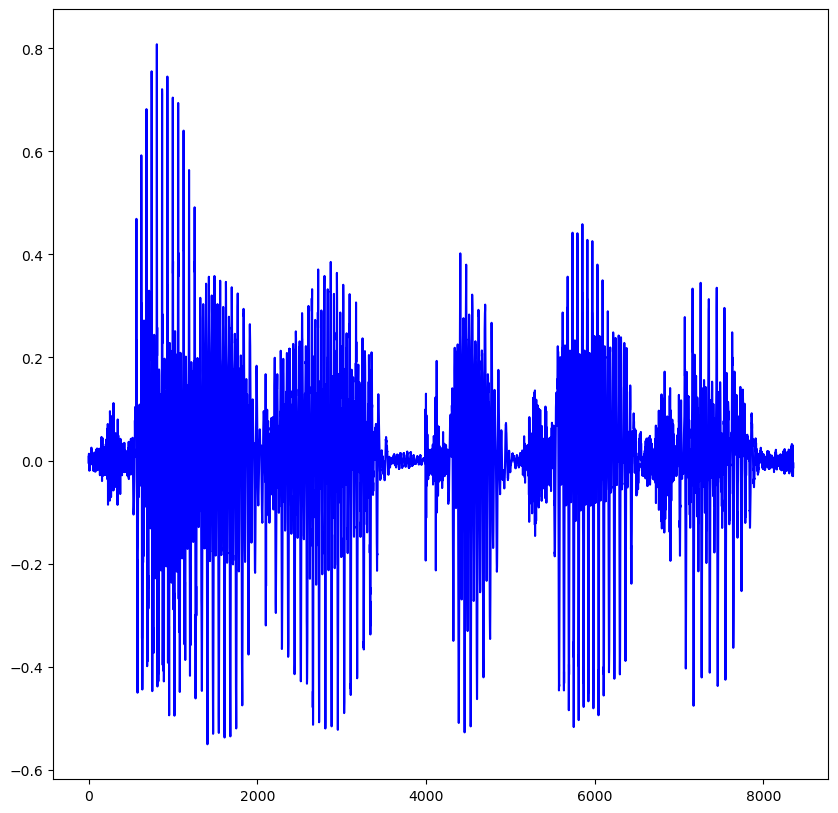

In [3]:
# when loading sampled data, both the data and the sampling rate are returned
y,sr = Sp.load_data( "demo/friendly.wav")  
print("sampling rate=",sr)
plt.plot(y);

## Transcribing, Segmenting and Recognizing Speech

Speech is a continuous signal without clear boundaries between successive sounds. Written language on the other hand is a sequence of discrete symbols.
A discrete transcription of such continuous signal including segmental boundaries is referred to as a *segmentation*.  
Making such segmentations suggests that 2 levels of discretization are possible and plausible:   
- boundaries in time between two successive sounds
- categorical classification of elementary speech sounds

As you will observe when working with speech, this is far from trivial.
Related to this paradox, don't forget that you learned to listen before you were 1 yr old, you learned to speak as a toddler and you only learned about written language when you were six.  
Listening and speaking came intuitively, writing was hard work at school. 

Observe that different levels of transcription will show greatly different levels of ambiguity.
Humans are excellent at **transcribing speech into words** if the quality of speech is good. 
On the contrary **segmentations** at the *letter or phoneme* level made by different people are highly *ambiguous*, both in terms of transcription and boundaries.

We don't speak as formal as a transcription would suggest and some speakers swallow more sounds than others ...
These are all just a few considerations why **speech recognition** will not be trivial.

#### Transcriptions and Alignments in *pyspch*

The *Spd.PlotWaveform()* routine yields a waveform plot with correctly labeled time axis and the option for overlaying the plot with a given segmentation.

An *segmentation* contains a collection of (start_time, end_time, symbol) typically assembled in a pandas DataFrame.  
Commonly used segmentations and file extensions are:   
- .wrd:  a word level segmentation
- .syl:  a syllabic segmentation
- .gra:  a graphemic segmentation (using letters and letter groups)
- .phn:  a phonetic segmentation

Segmentations may (or may not) contain non-speech symbols such as sil (silence), xxx( background noise), hhh (hesitation noise), ggg (garbled speech noise), ...   Note these non-speech symbols, except for silence, are not well standardized.

 

In [4]:
name = "demo/friendly"
segwrd = Sp.load_data(name+".wrd")
seg = Sp.load_data(name+".phn")
print("Phonetic segmentation of: ","'"+" ".join(segwrd.seg)+"'")
seg.T

Phonetic segmentation of:  'friendly computers'


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
t0,0.01,0.05,0.07,0.17,0.25,0.28,0.32,0.44,0.49,0.52,0.61,0.64,0.69,0.72,0.81,0.88,0.96,1.0
t1,0.05,0.07,0.17,0.25,0.28,0.32,0.44,0.49,0.52,0.61,0.64,0.69,0.72,0.81,0.88,0.96,1.0,1.04
seg,f,r,eh,n,d,l,iy,sil,k,ah,m,p,y,uw,t,eh,r,z


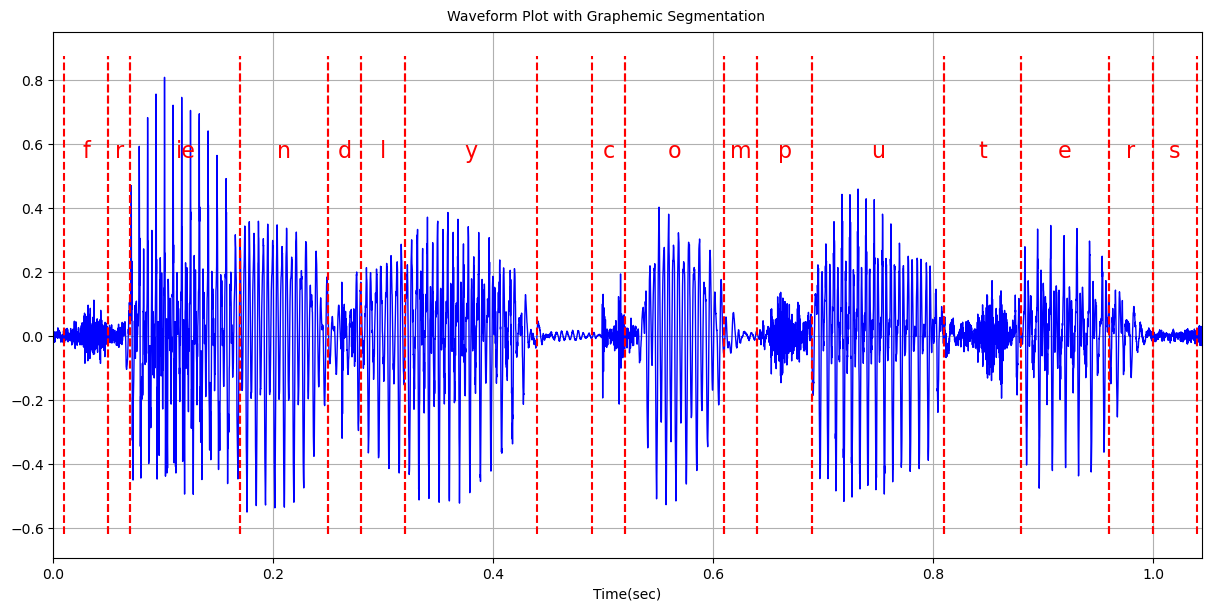

In [5]:
name = "demo/friendly"
wavdata,sr = Sp.load_data(name+".wav")
seg = Sp.load_data(name+".gra")
Spd.PlotWaveform(wavdata,sample_rate=sr,seg=seg,title="Waveform Plot with Graphemic Segmentation")

## Example GUI
This GUI will gather all wavfiles in a given (local) directory and let you select a file via a dropdown menu.
Then it goes out to look for segmentations.  You can listen to the AUDIO as well.

In [6]:
class Signals(widgets.VBox):
    def __init__(self,dir="demo/",figsize=(12,6),dpi=100):
        super().__init__()
        self.dir = dir
        self.transcript = "bla bla"
        
        all_files = pkg_resources.resource_listdir('pyspch',"data/"+self.dir) #  os.listdir(self.dir) -- this works with local installs only
        print(all_files)
        self.names =  [ name.split('.',maxsplit=1)[0]  for name in  all_files if name.split('.',maxsplit=1)[1] == "wav"] 
        print(self.names)
        self.wg_signals = widgets.Dropdown(options=self.names,value=self.names[0],description="Signal") 
        self.wg_signals.observe(self.signals_observe,'value')  
        self.wg_rate = widgets.IntText(
            value=0,
            description='Rate:',
            disabled=True   
        )
        self.wg_transcript = widgets.Text(
            value='---',
            placeholder='---',
            description='Transcript:',
            disabled=True   
        )
        self.wg_rate.layout.width = '20%'
        self.wg_transcript.layout.width='50%'
        self.signal = self.names[0]
        self.audio = widgets.Output()
        self.out = widgets.Output(layout=box_layout())
        self.UI = widgets.HBox( [self.wg_signals, self.wg_rate,self.wg_transcript],layout=box_layout())

        self.update()
        plt.close()
        self.children = [ self.UI, self.out, self.audio]
        
    def update(self):
        name = self.dir + self.signal
        y,self.sample_rate = Sp.load_data(name+".wav")
        self.fig = Spd.PlotWaveform(y,sample_rate=self.sample_rate)
        
        # try to add segmentations
        # The TIMIT segmentation files in the demo dir are slightly different than the original ones
        # Sample level segmentations were converted to time based segmentation
        # and the phonetic alphabet was collapsed to the CMU set (+closure)
        segwrd = None
        transcript = None
        # first find a word segmentation
        #try:
        segwrd = Sp.load_data(self.dir+self.signal+".wrd",dt=None)
        if segwrd is not None:
            self.fig.add_seg_plot(segwrd,iax=0,ypos=0.95,color="red",size=12,Lines=True)
            transcript = " ".join(segwrd.seg)
        
        # then add grapheme or phoneme segmentation
        seg = None
        seg = Sp.load_data(self.dir+self.signal+".gra")
        if seg is None:
            seg = Sp.load_data(self.dir+self.signal+".phn")          
        if seg is not None:
            self.fig.add_seg_plot(seg,iax=0,ypos=0.05,color="blue",size=12,Lines=True)
        if transcript is None:
            try:
                transcript = " ".join(seg.seg)
            except:
                transcript = ""
        self.wg_transcript.value = transcript 
        self.wg_rate.value = self.sample_rate
        with self.out:
            clear_output(wait=True)
            display(self.fig)
        with self.audio:
            clear_output(wait=True)
            display(Audio(data=y,rate=self.sample_rate,normalize=False,autoplay=False))
                
    def signals_observe(self,change):
        self.signal = change.new
        self.update()
        
Signals(dir="demo/")

['bad_bead_booed.phn', 'bad_bead_booed.wav', 'bad_bead_booed.wrd', 'beed.wav', 'b_8k.wav', 'd15zz6.wav', 'd15zz6.wrd', 'expansionist.gra', 'expansionist.phn', 'expansionist.wav', 'expansionist.wrd', 'expansionist_8k.wav', 'female1.wav', 'female2.wav', 'friendly.gra', 'friendly.ogg', 'friendly.phn', 'friendly.syl', 'friendly.wav', 'friendly.wrd', 'horse.wav', 'male1.gra', 'male1.syl', 'male1.wav', 'male1.wrd', 'male1_recognize.wav', 'male1_speech.wav', 'mini_corpus.lst', 'mini_corpus.txt', 'misinterpret.wav', 'splat.wav', 'timit_f1_sa1.phn', 'timit_f1_sa1.wav', 'timit_f1_sa1.wrd', 'timit_f1_sa2.phn', 'timit_f1_sa2.wav', 'timit_f1_sa2.wrd', 'timit_f1_si1027.phn', 'timit_f1_si1027.wav', 'timit_f1_si1027.wrd', 'timit_f2_sa2.phn', 'timit_f2_sa2.wav', 'timit_f2_sa2.wrd', 'timit_m1_sa1.phn', 'timit_m1_sa1.wav', 'timit_m1_sa1.wrd', 'timit_m1_sa2.phn', 'timit_m1_sa2.wav', 'timit_m1_sa2.wrd', 'train.wav', 'voice_processing.wav']
['bad_bead_booed', 'beed', 'b_8k', 'd15zz6', 'expansionist', 'expan

Signals(children=(HBox(children=(Dropdown(description='Signal', options=('bad_bead_booed', 'beed', 'b_8k', 'd1…

## Working with data on a remote URL resource and spectrogram plot
This shows how to load data from a remote resource.
The signal waveform is complemented with a spectrogram and multiple tears of segmentations.

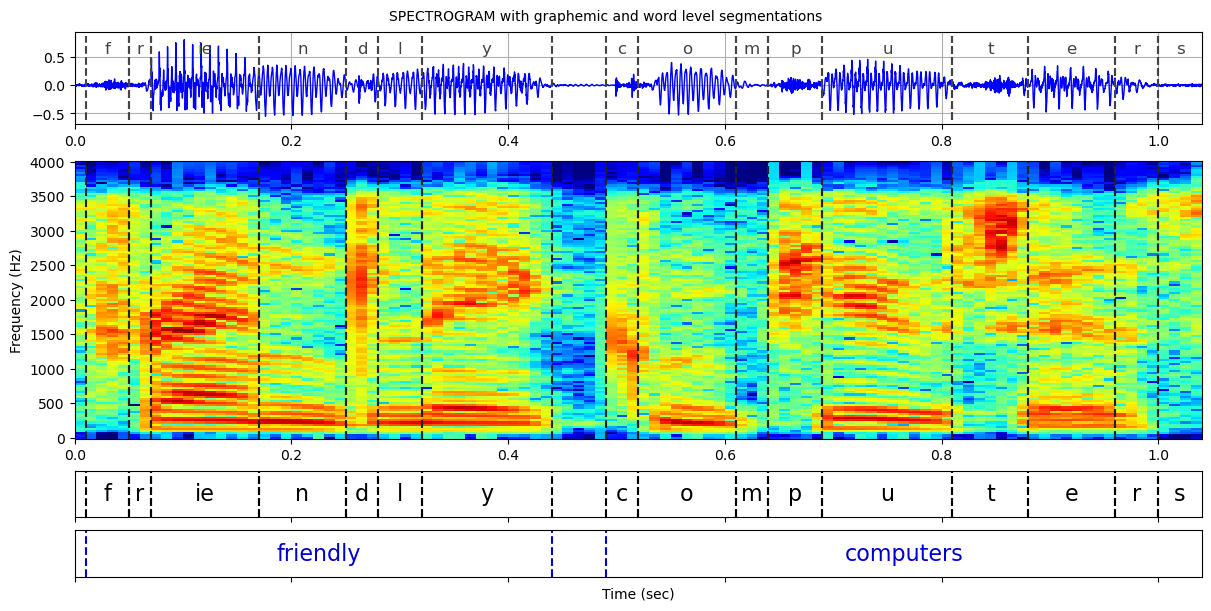

In [7]:
dir = "https://homes.esat.kuleuven.be/~spchlab/data/"
name = "demo/friendly"

seg = Sp.load_data(name+".gra",root=dir)  
segwrd = Sp.load_data(name+".wrd",root=dir)  
wavdata, sr = Sp.load(dir+name+".wav")
shift=0.01
spg = Sps.spectrogram(wavdata,sample_rate=sr,f_shift=shift)
# this shows the spectrogram with two extra tiers of segmentations given in segdata
fig = Spd.PlotSpgFtrs(wavdata=wavdata,spgdata=spg,segdata=[seg,segwrd],sample_rate=sr,dy=None)
# the next 2 lines overlay segmentations in the waveform and spectrogram pane
fig.add_seg_plot(seg,iax=0,ypos=0.85,color="#444",size=12,Lines=True)
fig.add_seg_plot(seg,iax=1,ypos=None,color="#222")
fig.suptitle("SPECTROGRAM with graphemic and word level segmentations")
display(fig)

In [9]:
#! jupyter nbconvert Segmentations.ipynb --to html

[NbConvertApp] Converting notebook Segmentations.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1014750 bytes to Segmentations.html
